# Song Classification -- Random Forest

#### Problem description: The problem is to classify a set of 200 songs, and predict Andreas Lindholm's preferences(Like or Dislike), with a training data set with 750 labeled songs. 

In this part, tree classification will be used for this notebook, and the structure as follows:

+ [1. Import Libraries](#1)<br>
+ [2. Load Song-Data](#2)<br>
+ [3. Feature selection](#3)<br>
+ [4. Random Forest](#4)<br>
+ [5. Cross Validation](#5)<br>
+ [5.1 Choose criterion and ccp](#5.1)<br>
+ [5.2 Choose the number of Estimators](#5.2)<br>
+ [6. Get solution](#6)<br>


## <a id = 1>1. Import Libraries</a>

In [1]:
import numpy as np # to do linear algebra


import pandas as pd # to store the data 


import matplotlib.pyplot as plt # to create plots


from sklearn.ensemble import RandomForestClassifier # to create random forest
import sklearn.tree as skl_tr # to create tree model


# to split train-test data
from sklearn.model_selection import train_test_split  


# to calculate the accuracy
from sklearn.metrics import accuracy_score


# to do cross validation
from sklearn.model_selection import KFold


# to select feature
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


# to do cross validation
from sklearn.model_selection import cross_val_score  

## <a id = 2>2. Load Song-data</a>

In [2]:
# load data
song = pd.read_csv('../../data/training_data.csv', na_values='?', dtype={'ID': str}).dropna().reset_index()

print('Shape Song:\t{}'.format(song.shape))
song.sample(5)

Shape Song:	(750, 15)


,index,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
116,116,0.95200,0.327,240600,0.280,0.000033,2,0.1040,-9.003,1,0.0408,83.047,4,0.130,1
715,715,0.83900,0.342,335667,0.243,0.894000,8,0.1080,-20.631,1,0.0327,143.985,4,0.253,1
313,313,0.00287,0.709,156005,0.960,0.524000,11,0.2720,-3.891,1,0.1950,160.065,4,0.882,0
135,135,0.54300,0.717,261773,0.916,0.000156,11,0.0854,-6.047,1,0.0344,133.144,4,0.964,1
63,63,0.01210,0.736,211023,0.773,0.005310,1,0.3330,-5.092,1,0.0433,103.026,4,0.264,1


There are 750 songs in the 'training_data', and 13 fetures which contains categorical data and numerical data.

## <a id = 3>3. Feature selection</a>

In [3]:
attr = ['acousticness','danceability','duration',
        'energy','instrumentalness','key','liveness',
        'loudness','mode','speechiness','tempo',
        'time_signature','valence']
label = 'label'

# the colinearity between different feature by geometric
# pd.plotting.scatter_matrix(song[attr], figsize = (10,10))
# plt.show()

# the colinearity between different feature by numeric
# song[attr].corr()

From above graph and table, energy and loudness are collinear with most other features.

However, the data interpretability of decision trees and random forests will be affected by multicollinearity. Random forest can return the essence of the feature (importantce), when there is multicollinearity, the importance will be affected. The importance of some multicollinearity features will be offset each other, thus affecting our interpretation and understanding of features.

## <a id = 4>4. Random Forest</a>

#### <p>ccp alpha: Increase the number of nodes pruned </p>
<a href = 'https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py'>
ccp introduction
</a>  
<p><p/>
<a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>
decision tree classifier Introduction
</a>


In [4]:
# split train-test data 8:2
X_train, X_test, Y_train, Y_test = train_test_split(song[attr],
                                                    song[label],
                                                    test_size = 0.2,
                                                    random_state = 1)


# train random forest model
rf = RandomForestClassifier(criterion = 'gini',                
                            n_estimators = 100,
#                             max_depth=5,                          
                            min_samples_split = 2,
                            min_samples_leaf = 1,
#                             ccp_alpha = 0.016,
                            random_state=1
                           ) 
rf.fit(X_train, Y_train)


# test random forest model
y_pred = rf.predict(X_test)
print(accuracy_score(Y_test, y_pred))

0.78


### After run the experiments with different parameters many times, observed that:   

1. 'max_depth' and 'ccp_alpha' can be used to purning. Here choose 'ccp_alpha' to purn.  

2. feature selection criterion has two option 'gini' and 'entropy'  

3. splitter can be choose 'best' or 'random', 'best' gets best split way.  

4. n_estimators decides the number of the trees

#### To determined which parameters work better, the cross validation will be used in next section.

## <a id = 5>5. Cross Validation</a>
### <a id = 5.1> 5.1 Choose criterion and ccp\_alpha</a>

In [5]:
x = song[attr]; y = song[label]

In [6]:
# cross validation result for entropy criterion with different 'ccp_alpha'
accuracyRateEntropyCV = []
ccp_alpha = np.arange(0,0.052, 0.002)
for i in ccp_alpha:
    score = []
    
    # Run 10 times to test the stablity of model

    model = RandomForestClassifier(criterion = 'entropy',                
                                    n_estimators = 100,
                                    min_samples_split = 2,
                                    min_samples_leaf = 1,
                                    ccp_alpha = i,
                                    random_state = 1
                                   ) 
    
    score = cross_val_score(model,X = x, y = y,cv=10)
    
    accuracyRateEntropyCV.append(np.average(score))
    
print(accuracyRateEntropyCV)

[0.8346666666666668, 0.8346666666666668, 0.8333333333333333, 0.8293333333333333, 0.8306666666666667, 0.828, 0.8253333333333334, 0.8213333333333335, 0.8186666666666668, 0.8186666666666668, 0.8186666666666668, 0.8119999999999999, 0.8160000000000001, 0.8093333333333333, 0.8066666666666666, 0.8013333333333333, 0.8, 0.8, 0.8, 0.8013333333333333, 0.8026666666666665, 0.8013333333333333, 0.7986666666666666, 0.8013333333333333, 0.8, 0.7986666666666666]


In [7]:
# cross validation result for gini criterion with different 'ccp_alpha'
accuracyRateGiniCV = []
ccp_alpha = np.arange(0,0.052, 0.002)
for i in ccp_alpha:
    score = []
    
    # Run 10 times to test the stablity of model

    model = RandomForestClassifier(criterion = 'gini',                
                                    n_estimators = 100,
                                    min_samples_split = 2,
                                    min_samples_leaf = 1,
                                    ccp_alpha = i,
                                    random_state = 1
                                   ) 
    
    score = cross_val_score(model,X = x, y = y,cv=10)
    
    accuracyRateGiniCV.append(np.average(score))
    
print(accuracyRateGiniCV)

[0.8400000000000001, 0.836, 0.8306666666666667, 0.8306666666666667, 0.8160000000000001, 0.8119999999999999, 0.808, 0.804, 0.8053333333333335, 0.7986666666666666, 0.8013333333333333, 0.7973333333333333, 0.8, 0.7986666666666667, 0.8, 0.8026666666666665, 0.8039999999999999, 0.8013333333333333, 0.8026666666666668, 0.8053333333333332, 0.808, 0.8, 0.7986666666666666, 0.7933333333333333, 0.796, 0.7946666666666666]


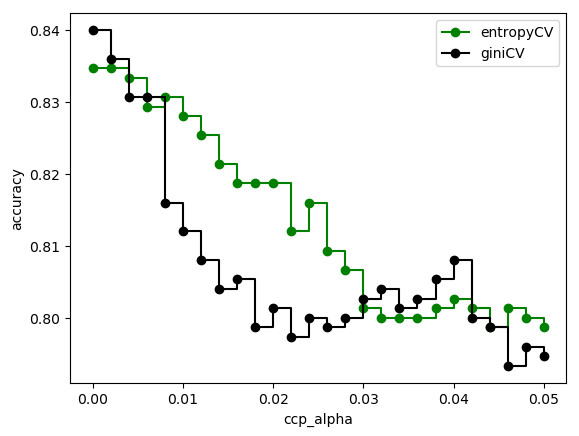

In [8]:
plt.plot(ccp_alpha, accuracyRateEntropyCV, color = 'green',marker ='o', label ='entropyCV', drawstyle="steps-post")
plt.plot(ccp_alpha, accuracyRateGiniCV, color = 'black',marker = 'o', label = 'giniCV',drawstyle="steps-post" )

plt.xlabel('ccp_alpha')
plt.ylabel('accuracy')
plt.legend()
plt.show()

#### Conclusion
The graph shows that when ccp_alpha incresed, the accuracy on a downward trend, so for a random forest model, the best ccp_alpha is $0$, since the subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen and others will be abondaned.  
  
  
The model trained with 'gini' criterion has higher peak value of the accuracy, so here we choose 'gini' and cpp\_alpha with '0'.

### <a id = '5.2'>5.2 Choose the number of Estimators</a>

In [9]:
# cross validation result for gini criterion with different 'ccp_alpha'
accuracyRateGiniCV = []
n = 200
for i in range(n):
    score = []
    # Run 10 times to test the stablity of model

    model = RandomForestClassifier(criterion = 'gini',                
                                    n_estimators = i+1,
                                    min_samples_split = 2,
                                    min_samples_leaf = 1,
                                    ccp_alpha = 0,
                                    random_state = 1
                                   ) 
    
    score = cross_val_score(model,X = x, y = y,cv=10)
    
    accuracyRateGiniCV.append(np.average(score))

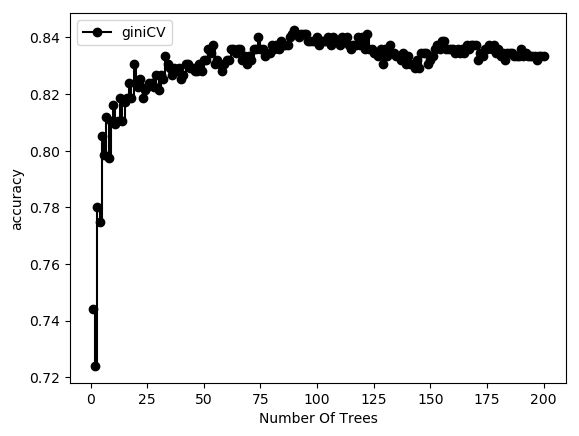

In [10]:
n_estimator = np.arange(1,201,1)
plt.plot(n_estimator, accuracyRateGiniCV, color = 'black',marker = 'o', label = 'giniCV',drawstyle="steps-post" )
plt.xlabel('Number Of Trees')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [11]:
print(accuracyRateGiniCV.index(max(accuracyRateGiniCV)))
print(accuracyRateGiniCV[89])
print(accuracyRateGiniCV[80:100])

89
0.8426666666666666
[0.8360000000000001, 0.8373333333333333, 0.836, 0.8386666666666667, 0.8373333333333333, 0.8373333333333333, 0.8373333333333333, 0.8400000000000001, 0.8413333333333334, 0.8426666666666666, 0.8413333333333334, 0.8400000000000001, 0.8413333333333334, 0.8413333333333334, 0.8413333333333334, 0.8386666666666667, 0.8386666666666667, 0.8386666666666667, 0.8386666666666667, 0.8400000000000001]


## <a id = 6>6. Get solution</a>
#### On this section, we will use 'gini' criterion, n_estimators = 100 and ccp_alpha = 0 to train our data with whole training set.

In [12]:
rf = RandomForestClassifier(criterion = 'gini',                
                                    n_estimators = 89,
                                    min_samples_split = 2,
                                    min_samples_leaf = 1,
                                    ccp_alpha = 0,
                                    random_state = 1
                                   ) 

rf.fit(x, y)

RandomForestClassifier(ccp_alpha=0, n_estimators=89, random_state=1)

In [13]:
# verify model by use the training data
predict = rf.predict(song[attr])

print('The train accuracy is \t{}'.format(np.mean(predict == song[label])))

The train accuracy is 	1.0


#### Now predict the test set

In [15]:
test = pd.read_csv('../../data/songs_to_classify.csv',
                   na_values='?',
                   dtype={'ID': str}).dropna().reset_index()[attr]


predict = rf.predict(test)

# format the solution as '001100...'
res = str(str(predict).split(','))
solution = ''
for i in range(len(res)):
    if res[i].isdigit():
        solution += res[i]
        
print(solution)    

11100101011110011001101111111001110111101010110100000110100010001100100111010000101111110011110011111010011010110011111111110001011011111101111111101010101001111010010101111010101110101010101111111000
